In [1]:
import pandas as pd
import numpy as np

import os
import requests
import json

from ydata_profiling import ProfileReport # for EDA

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ruta_data = "../data/data_casal_montserratina/"

# Petición a la API de weatherbit 

In [3]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2022-01-01'
# end_date = '2022-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# #nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2022.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")  

In [4]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2023-01-01'
# end_date = '2023-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# # nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2023.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")

In [5]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2024-01-01'
# end_date = '2024-05-07'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# #nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2024.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")  

# Lectura .JSON y desarollo del Dataframe

In [6]:
def load_json_to_DF(ruta, nombre_archivo):

    # Concatenamos la ruta completa
    ruta_completa = os.path.join(ruta, nombre_archivo)

    # Abrimos el archivo y cargamos el JSON
    with open(ruta_completa) as archivo:
        datos = json.load(archivo)
    # print("Archivo .JSON cargado correctamente.")

    # Extraer los datos de la clave "data"
    datos = datos["data"] 
    # print("Datos extraidas correctamente.")

    # Convertir a DataFrame
    datos = pd.DataFrame(datos)
    # print("DataFrame creado correctamente.")

    return datos

In [7]:
def format_df (dataframe):
    """
    VARIABLES METEREOLOGICAS 
    timestamp_local: Timestamp at Local time.
    pres: Pressure (mb).
    slp: Sea level pressure (mb).
    wind_spd: Wind speed (Default m/s).
    wind_gust_spd: Wind gust speed (Default m/s).
    wind_dir: Wind direction (degrees).
    temp: Temperature (default Celsius).
    app_temp: Apparent/"Feels Like" temperature (default Celsius).
    rh: Relative humidity (%).
    dewpt: Dew point (default Celsius).
    clouds:[Satellite based] cloud coverage (%).
    vis: Visibility (default KM).
    precip: Accumulated liquid equivalent precipitation (default mm).
    dhi: Diffuse horizontal solar irradiance (W/m^2) [Clear Sky]
    dni: Direct normal solar irradiance (W/m^2) [Clear Sky]
    ghi: Global horizontal solar irradiance (W/m^2) [Clear Sky]
    solar_rad: Estimated Solar Radiation (W/m^2).
    uv: UV Index (0-11+).
    elev_angle: Solar elevation angle (degrees).
    azimuth: Solar azimuth angle (degrees).
    """
    
    # vienen muchas columnas, solo interesa quedarme con algunas
    columnas_deseadas = ['timestamp_local', 'pres', 'slp', 'wind_dir', 'wind_gust_spd', 'wind_spd', 'temp', 'app_temp', 'rh', 
                         'dewpt', 'clouds', 'vis', 'precip', 'dhi', 'dni', 'ghi', 'solar_rad', 'uv', 'elev_angle','azimuth']


    # Seleccionar solo las columnas deseadas
    dataframe = dataframe.loc[:, columnas_deseadas]


    dataframe = dataframe.rename(columns={ 
    "temp": "temp [C]", 
    "wind_spd": "wind_spd [m/s]", 
    "dhi": "dhi [W/m^2]", 
    "ghi": "ghi [W/m^2]", 
    "dni": "dni [W/m^2]", 
    'clouds': 'clouds [%]', 
    'dewpt': 'dewpt [C]', 
    'rh': 'rh [%]',
    'pres' : 'pres [mb]', 
    'slp' : 'slp [mb]', 
    'wind_dir' : 'wind_dir [m/s]', 
    'wind_gust_spd' : 'wind_gust_spd [m/s]', 
    'app_temp' : 'app_temp [C]', 
    'vis' : 'vis [Km]', 
    'precip' : 'precip [mm]',  
    'solar_rad' : 'solar_rad [W/m^2]', 
    'uv' : 'uv [0-11+]', 
    'elev_angle' : 'elev_angle [º]',
    'azimuth' : 'azimuth [º]'
    })

    return dataframe

In [8]:
# Load the JSON file
nombre_archivo_2022 = "hourly_weather_2022.json"
df_2022 = load_json_to_DF(ruta_data, nombre_archivo_2022)

nombre_archivo_2023 = "hourly_weather_2023.json"
df_2023 = load_json_to_DF(ruta_data, nombre_archivo_2023)

nombre_archivo_2024 = "hourly_weather_2024.json"
df_2024 = load_json_to_DF(ruta_data, nombre_archivo_2024)

In [9]:
# hago un concat de los dos dataframes
df = pd.concat([df_2022, df_2023, df_2024])
df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,10.7,323.5,87,2021-12-31:23,9.5,0,0,-68.4,0,None,...,10.7,2022-01-01T00:00:00,2021-12-31T23:00:00,1640991600,0.0,11,"{'code': 804, 'icon': 'c04n', 'description': '...",360,4.0,1.0
1,10.7,3.8,62,2022-01-01:00,8.8,0,0,-71.7,0,None,...,10.7,2022-01-01T01:00:00,2022-01-01T00:00:00,1640995200,0.0,12,"{'code': 803, 'icon': 'c03n', 'description': '...",350,4.4,2.6
2,10.7,41.8,87,2022-01-01:01,9.0,0,0,-67.2,0,None,...,10.7,2022-01-01T02:00:00,2022-01-01T01:00:00,1640998800,0.0,8,"{'code': 804, 'icon': 'c04n', 'description': '...",350,5.2,2.6
3,10.2,64.8,68,2022-01-01:02,8.5,0,0,-58.1,0,None,...,10.2,2022-01-01T03:00:00,2022-01-01T02:00:00,1641002400,0.0,8,"{'code': 803, 'icon': 'c03n', 'description': '...",350,5.2,2.6
4,10.5,79.3,75,2022-01-01:03,9.3,0,0,-47.4,0,None,...,10.5,2022-01-01T04:00:00,2022-01-01T03:00:00,1641006000,0.0,2,"{'code': 721, 'icon': 'a03n', 'description': '...",340,5.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,17.0,275.2,100,2024-05-06:17,11.9,76,659,19.9,294,None,...,17.0,2024-05-06T19:00:00,2024-05-06T17:00:00,1715014800,0.7,16,"{'code': 804, 'icon': 'c04d', 'description': '...",100,5.8,5.1
3043,17.0,284.6,100,2024-05-06:18,11.9,48,433,8.9,106,None,...,17.0,2024-05-06T20:00:00,2024-05-06T18:00:00,1715018400,0.6,16,"{'code': 804, 'icon': 'c04d', 'description': '...",90,4.5,4.1
3044,16.0,294.3,42,2024-05-06:19,12.0,0,0,-1.8,0,None,...,16.0,2024-05-06T21:00:00,2024-05-06T19:00:00,1715022000,0.0,16,"{'code': 803, 'icon': 'c03n', 'description': '...",100,2.2,2.1
3045,16.0,304.9,81,2024-05-06:20,12.0,0,0,-11.5,0,None,...,16.0,2024-05-06T22:00:00,2024-05-06T20:00:00,1715025600,0.0,16,"{'code': 804, 'icon': 'c04n', 'description': '...",0,0.5,0.5


# Analisis del DF resultante

In [10]:
# Convertir la columna "fecha" a datetime
df["timestamp_local"] = pd.to_datetime(df["timestamp_local"], format="%Y-%m-%dT%H:%M:%S")
#df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], format="%Y-%m-%dT%H:%M:%S")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20519 entries, 0 to 3046
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   app_temp         20519 non-null  float64       
 1   azimuth          20519 non-null  float64       
 2   clouds           20519 non-null  int64         
 3   datetime         20519 non-null  object        
 4   dewpt            20519 non-null  float64       
 5   dhi              20519 non-null  int64         
 6   dni              20519 non-null  int64         
 7   elev_angle       20519 non-null  float64       
 8   ghi              20519 non-null  int64         
 9   h_angle          0 non-null      object        
 10  pod              20519 non-null  object        
 11  precip           20519 non-null  float64       
 12  pres             20519 non-null  int64         
 13  revision_status  20519 non-null  object        
 14  rh               20519 non-null  int64      

In [12]:
df.columns

Index(['app_temp', 'azimuth', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni',
       'elev_angle', 'ghi', 'h_angle', 'pod', 'precip', 'pres',
       'revision_status', 'rh', 'slp', 'snow', 'solar_rad', 'temp',
       'timestamp_local', 'timestamp_utc', 'ts', 'uv', 'vis', 'weather',
       'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')

In [13]:
df = format_df(df)

In [14]:
# # Generate the report
# profile = ProfileReport(df,title="hourly_weather_2022_2023", tsmode=True, sortby="timestamp_local")

# # Save the report to .html
# profile.to_file("hourly_weather_2022_2023.html")

# profile

no se observan duplicados, NaNs, faltantes, etc.... el df está muy limpio.


Variable Weatherbit      Descripción                                       Unidades 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
timestamp_local          Timestamp en la hora local  
timestamp_utc            Timestamp en UTC 
temp                     Temperatura                                        Celsius (por defecto) 
wind_spd                 Velocidad del viento                               m/s (por defecto) 
dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

# Armonizacion de unidades de Medida

para evitar incongreuencia con las unidades, las agrego al nombre de la variable. ya veré si es necesario mantenerla en las mismas unidades o cambiarlas mediante => Irradiancia[kW/m2] = Irradiancia[W/m2]/1000;



# Resample - Cambiar frecuencia horaria a cuarto-horaria

In [15]:
df.set_index("timestamp_local", inplace=True)

In [16]:
df.tail()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
timestamp_local,,,,,,,,,,,,,,,,,,,
2024-05-06 19:00:00,1011,1012,100,5.8,5.1,17.0,17.0,72,11.9,100,16,0.0,76,659,294,95,0.7,19.9,275.2
2024-05-06 20:00:00,1012,1013,90,4.5,4.1,17.0,17.0,72,11.9,100,16,0.0,48,433,106,54,0.6,8.9,284.6
2024-05-06 21:00:00,1013,1014,100,2.2,2.1,16.0,16.0,77,12.0,42,16,0.0,0,0,0,0,0.0,-1.8,294.3
2024-05-06 22:00:00,1013,1014,0,0.5,0.5,16.0,16.0,77,12.0,81,16,0.0,0,0,0,0,0.0,-11.5,304.9
2024-05-06 23:00:00,1014,1015,230,1.6,1.5,15.0,15.0,82,12.0,100,16,0.0,0,0,0,0,0.0,-20.0,317.0


In [17]:
# df_upsampled = df.groupby(level=-1).first()
df_upsampled = df.copy()
df_upsampled.drop_duplicates(inplace=True)
df_upsampled.head()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
timestamp_local,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1027,1028,360,4.0,1.0,10.7,10.7,92,9.5,87,11,0.0,0,0,0,0,0.0,-68.4,323.5
2022-01-01 01:00:00,1027,1028,350,4.4,2.6,10.7,10.7,88,8.8,62,12,0.0,0,0,0,0,0.0,-71.7,3.8
2022-01-01 02:00:00,1026,1027,350,5.2,2.6,10.7,10.7,89,9.0,87,8,0.0,0,0,0,0,0.0,-67.2,41.8
2022-01-01 03:00:00,1026,1027,350,5.2,2.6,10.2,10.2,89,8.5,68,8,0.0,0,0,0,0,0.0,-58.1,64.8
2022-01-01 04:00:00,1026,1027,340,5.2,1.5,10.5,10.5,92,9.3,75,2,0.0,0,0,0,0,0.0,-47.4,79.3


In [18]:
df_upsampled = df.copy()
df_upsampled = df_upsampled.groupby(df_upsampled.index).first().resample('15T').interpolate(method='linear')
#df_upsampled.head(4)

C:\Users\afernandez\AppData\Local\Temp\ipykernel_42952\1011488432.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_upsampled = df_upsampled.groupby(df_upsampled.index).first().resample('15T').interpolate(method='linear')


In [19]:
#df_upsampled.tail(4)

In [20]:
dff = df_upsampled.reset_index()
dff

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º]
0,2022-01-01 00:00:00,1027.00,1028.00,360.0,4.000,1.00,10.70,10.70,92.00,9.500,87.00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,-68.400,323.500
1,2022-01-01 00:15:00,1027.00,1028.00,357.5,4.100,1.40,10.70,10.70,91.00,9.325,80.75,11.25,0.0,0.0,0.0,0.0,0.0,0.0,-69.225,243.575
2,2022-01-01 00:30:00,1027.00,1028.00,355.0,4.200,1.80,10.70,10.70,90.00,9.150,74.50,11.50,0.0,0.0,0.0,0.0,0.0,0.0,-70.050,163.650
3,2022-01-01 00:45:00,1027.00,1028.00,352.5,4.300,2.20,10.70,10.70,89.00,8.975,68.25,11.75,0.0,0.0,0.0,0.0,0.0,0.0,-70.875,83.725
4,2022-01-01 01:00:00,1027.00,1028.00,350.0,4.400,2.60,10.70,10.70,88.00,8.800,62.00,12.00,0.0,0.0,0.0,0.0,0.0,0.0,-71.700,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82264,2024-05-06 22:00:00,1013.00,1014.00,0.0,0.500,0.50,16.00,16.00,77.00,12.000,81.00,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-11.500,304.900
82265,2024-05-06 22:15:00,1013.25,1014.25,57.5,0.775,0.75,15.75,15.75,78.25,12.000,85.75,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-13.625,307.925
82266,2024-05-06 22:30:00,1013.50,1014.50,115.0,1.050,1.00,15.50,15.50,79.50,12.000,90.50,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-15.750,310.950
82267,2024-05-06 22:45:00,1013.75,1014.75,172.5,1.325,1.25,15.25,15.25,80.75,12.000,95.25,16.00,0.0,0.0,0.0,0.0,0.0,0.0,-17.875,313.975


In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82269 entries, 0 to 82268
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp_local      82269 non-null  datetime64[ns]
 1   pres [mb]            82269 non-null  float64       
 2   slp [mb]             82269 non-null  float64       
 3   wind_dir [m/s]       82269 non-null  float64       
 4   wind_gust_spd [m/s]  82269 non-null  float64       
 5   wind_spd [m/s]       82269 non-null  float64       
 6   temp [C]             82269 non-null  float64       
 7   app_temp [C]         82269 non-null  float64       
 8   rh [%]               82269 non-null  float64       
 9   dewpt [C]            82269 non-null  float64       
 10  clouds [%]           82269 non-null  float64       
 11  vis [Km]             82269 non-null  float64       
 12  precip [mm]          82269 non-null  float64       
 13  dhi [W/m^2]          82269 non-

# Estimación de la producción solar de un sistema fotovoltaico

Primero se calcula el parametro TM(t) que corresponde a la temperatura interior de los Modulos/placas a tiempo t.

La temperatura interior del m'odulo viene dada por  >>>> TM[i] = 17.23292 + 0.451708 * t_out[i] + 0.022706 * irr[i]

Donde:     
- t_out <-> temp ambiente (temp) [°C]
 
-  irr   <-> Irradiancia directa normal (dni) [kW/m2] 

In [22]:
df_upsampled["Temp interna Modulo [C]"] = 17.23292 + 0.451708 * df_upsampled["temp [C]"] + 0.022706 * df_upsampled["dni [W/m^2]"]

In [23]:
df_upsampled.head()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],vis [Km],precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C]
timestamp_local,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1027.0,1028.0,360.0,4.0,1.0,10.7,10.7,92.0,9.500,87.00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,-68.400,323.500,22.066196
2022-01-01 00:15:00,1027.0,1028.0,357.5,4.1,1.4,10.7,10.7,91.0,9.325,80.75,11.25,0.0,0.0,0.0,0.0,0.0,0.0,-69.225,243.575,22.066196
2022-01-01 00:30:00,1027.0,1028.0,355.0,4.2,1.8,10.7,10.7,90.0,9.150,74.50,11.50,0.0,0.0,0.0,0.0,0.0,0.0,-70.050,163.650,22.066196
2022-01-01 00:45:00,1027.0,1028.0,352.5,4.3,2.2,10.7,10.7,89.0,8.975,68.25,11.75,0.0,0.0,0.0,0.0,0.0,0.0,-70.875,83.725,22.066196
2022-01-01 01:00:00,1027.0,1028.0,350.0,4.4,2.6,10.7,10.7,88.0,8.800,62.00,12.00,0.0,0.0,0.0,0.0,0.0,0.0,-71.700,3.800,22.066196


luego se introduce la formula de generacion electrica de una placa solar

PV[i] = max(0, (((-0.062059 * irr[i] + 0.04277774) * TM[i] + 9.692792 * irr[i] - 1.885868)) * (PPv / 6.6))

donde:
- PV[i]     es la generacion electrica de una placa solar en las condiciones dadas. supongo que las unidades son [Kw]
- PPv       es la Potencia instalada / potencia máxima de generación [kW]
- irr[i]    es la Irradiancia directa normal [kW/m2] 
- TM[i]     es la temperatura interna del modulo/placa solar
 

In [24]:
PPvn = 5000 # 5Kw = 5000 watts
irr = df_upsampled["dni [W/m^2]"]
TM = df_upsampled["Temp interna Modulo [C]"]

df_upsampled["PV [Wh]"] = (np.maximum(0, ((-0.062059 * irr + 0.04277774)* TM) + 9.692792 * irr - 1.885868 )* PPvn) / 6.6

In [25]:
df_upsampled.sample(5)

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2022-05-30 10:15:00,1006.0,1007.0,102.5,7.3,6.325,22.950,22.45,43.75,9.850,15.75,...,0.0,104.50,831.0,644.75,637.00,4.200,41.275,96.725,46.468305,4.286662e+06
2024-02-16 19:00:00,1021.0,1022.0,140.0,2.4,1.000,14.000,14.00,84.00,11.300,37.00,...,0.0,0.00,0.0,0.00,0.00,0.000,-7.000,259.700,23.556832,0.000000e+00
2023-10-09 04:00:00,1023.0,1024.0,340.0,3.2,1.000,18.700,19.00,90.00,17.000,25.00,...,0.0,0.00,0.0,0.00,0.00,0.000,-43.100,51.800,25.679860,0.000000e+00
2022-11-27 08:15:00,1025.0,1026.0,360.0,6.2,6.200,6.525,2.75,71.75,1.775,14.00,...,0.0,17.75,127.0,31.25,35.75,0.675,2.525,121.525,23.063977,7.941718e+05
2024-01-03 12:00:00,1015.0,1015.0,250.0,8.0,5.700,17.000,17.00,60.00,9.200,25.00,...,0.0,89.00,754.0,395.00,392.00,0.900,24.500,165.800,42.032280,4.046578e+06


In [26]:
# # Calcular la suma de la producción solar por día y asignar a una nueva columna
# df_upsampled['suma_produccion_diaria'] = df_upsampled.groupby(df_upsampled.index)['PV'].transform('cumsum')

## outliers

In [27]:
df_PV =df_upsampled.copy()
df_PV.sample(5)

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2022-04-21 14:30:00,1001.50,1002.00,300.0,7.6,3.7000,12.600,12.600,84.0,10.000,56.0,...,2.625,120.00,915.50,896.00,617.50,2.600,58.900,198.750,43.711784,4.841098e+06
2024-04-01 16:15:00,1011.00,1011.25,239.0,12.9,8.5025,15.100,15.100,59.0,7.100,25.0,...,0.000,108.50,859.75,674.75,669.00,4.700,41.850,229.775,43.575194,4.551812e+06
2023-10-09 16:45:00,1022.00,1023.00,227.5,8.4,7.7000,25.075,25.400,68.5,18.875,12.0,...,0.000,87.25,740.50,405.00,383.75,2.750,25.775,233.150,45.373291,3.857918e+06
2023-11-03 17:45:00,999.75,1000.75,292.5,17.4,5.3925,16.425,16.425,37.5,1.875,25.0,...,0.000,10.75,93.75,19.50,19.25,0.450,-1.075,250.200,26.780911,5.698082e+05
2022-04-24 12:15:00,1006.25,1007.00,320.0,9.7,2.0250,19.350,18.650,49.5,8.500,25.0,...,0.000,117.00,902.00,844.75,837.75,6.775,54.700,137.700,46.454282,4.653499e+06


In [28]:
df_PV.describe()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
count,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.00000,82269.000000,82269.000000,82269.000000,82269.000000,...,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,8.226900e+04
mean,1016.125789,1016.768546,211.454363,6.153461,4.099403,17.33825,17.425942,68.854477,11.237916,29.853985,...,0.073472,42.267926,344.753431,227.129684,205.455518,1.283876,-0.477171,177.947551,32.892717,1.827891e+06
std,7.403214,7.412113,107.504602,2.984719,2.098144,6.77775,7.715605,13.617939,6.970910,22.547420,...,0.377090,46.766470,375.703397,301.761843,277.642799,1.898870,35.306645,96.830086,10.061748,1.961044e+06
min,983.000000,984.000000,0.000000,0.000000,0.000000,-0.50000,-5.300000,10.000000,-17.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-72.000000,0.000000,17.007066,0.000000e+00
25%,1012.000000,1013.000000,117.500000,4.000000,2.600000,12.35000,12.350000,60.000000,6.275000,15.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.050000,91.200000,23.669759,0.000000e+00
50%,1016.000000,1016.750000,225.000000,5.547500,3.722500,16.42500,16.425000,70.500000,11.000000,25.000000,...,0.000000,12.500000,100.250000,16.500000,20.250000,0.400000,-0.450000,176.200000,29.078962,6.073827e+05
75%,1020.000000,1021.000000,300.000000,7.600000,5.090000,23.07500,23.225000,79.000000,16.975000,34.000000,...,0.000000,90.500000,760.500000,430.250000,386.000000,1.900000,27.150000,265.300000,42.552846,4.057556e+06
max,1038.000000,1038.000000,360.000000,27.800000,15.900000,34.70000,41.500000,100.000000,26.700000,100.000000,...,12.000000,123.000000,924.000000,991.000000,970.000000,10.500000,72.100000,360.000000,53.388000,4.920826e+06


In [29]:
def getOutliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Calcular los límites inferiores y superiores para identificar outliers
    lim_inf = q1 - 2 * iqr
    lim_sup = q3 + 2 * iqr

    outliers = column[((column < lim_inf) | (column > lim_sup))]
    return outliers

In [30]:
def getNumberOfOutliersPerColumn(df, columns_list):
    outliers_count = {}  # Diccionario para almacenar el número de outliers por columna

    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        outliers_count[col] = outliers.sum()  # Almacenar el número de outliers por columna

    # Ordenar el diccionario por el número de outliers en orden decreciente
    sorted_outliers_count = dict(sorted(outliers_count.items(), key=lambda x: x[1], reverse=True))

    # Iterar sobre el diccionario ordenado y mostrar la información
    for col, count in sorted_outliers_count.items():
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 2 * iqr
        lim_sup = q3 + 2 * iqr
        print(f"For {col} Column, the Number of Outliers is {count}. \t\t >>> Sus límites son {lim_inf} y {lim_sup}.\n")


In [46]:
# Llamar a la función con tu dataframe y lista de columnas
getNumberOfOutliersPerColumn(df_PV, df_PV.columns.values)

For vis [Km] Column, the Number of Outliers is 18257. 		 >>> Sus límites son 16.0 y 16.0.

For precip [mm] Column, the Number of Outliers is 8150. 		 >>> Sus límites son 0.0 y 0.0.

For clouds [%] Column, the Number of Outliers is 7391. 		 >>> Sus límites son -22.25 y 71.5.

For uv [0-11+] Column, the Number of Outliers is 3930. 		 >>> Sus límites son -3.8 y 5.699999999999999.

For wind_spd [m/s] Column, the Number of Outliers is 1331. 		 >>> Sus límites son -2.3799999999999994 y 10.07.

For wind_gust_spd [m/s] Column, the Number of Outliers is 1312. 		 >>> Sus límites son -3.1999999999999993 y 14.799999999999999.

For slp [mb] Column, the Number of Outliers is 953. 		 >>> Sus límites son 997.0 y 1037.0.

For pres [mb] Column, the Number of Outliers is 919. 		 >>> Sus límites son 996.0 y 1036.0.

For rh [%] Column, the Number of Outliers is 158. 		 >>> Sus límites son 22.0 y 117.0.

For dewpt [C] Column, the Number of Outliers is 11. 		 >>> Sus límites son -15.125000000000002 y 38.375.

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


tiene sentido lo que se lee... que el viento sea muy racheado es normal. vientos de 15 m/s son casi 54 km/h!

### Precip [mm]

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


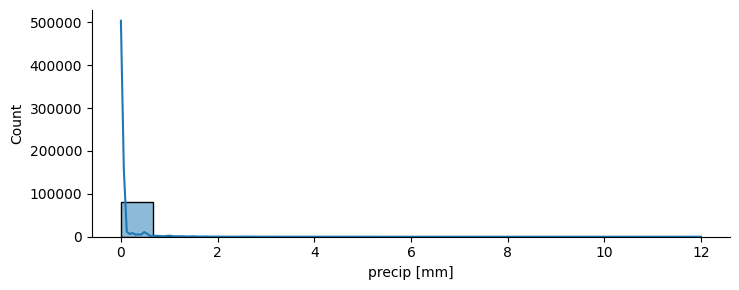

In [45]:
sns.displot(data=df_PV["precip [mm]"], kde=True, height=3, aspect= 2.5 );

In [47]:
df_PV["precip_LOG"] = np.log(df_PV["precip [mm]"])+1

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


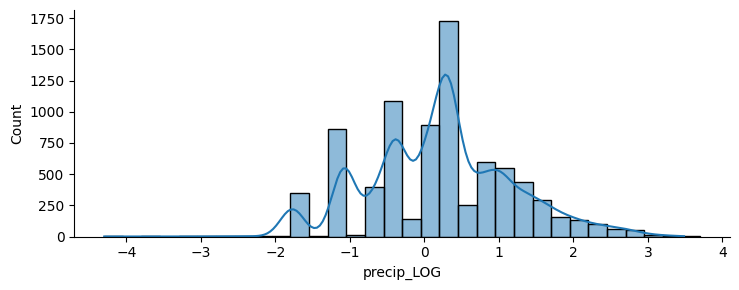

In [48]:
sns.displot(data=df_PV["precip_LOG"], binwidth=0.25, kde=True, height=3, aspect= 2.5 );

In [49]:
# Uso de la función
outliers_col1 = getOutliers(df_PV['precip_LOG'])
print("Número de outliers:", outliers_col1.shape[0])
print("Outliers:")
print(outliers_col1)

Número de outliers: 0
Outliers:
Series([], Freq: 15min, Name: precip_LOG, dtype: float64)


c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [36]:
df_PV.head()

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh],precip_LOG
timestamp_local,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1027.0,1028.0,360.0,4.0,1.0,10.7,10.7,92.0,9.500,87.00,...,0.0,0.0,0.0,0.0,0.0,-68.400,323.500,22.066196,0.0,-inf
2022-01-01 00:15:00,1027.0,1028.0,357.5,4.1,1.4,10.7,10.7,91.0,9.325,80.75,...,0.0,0.0,0.0,0.0,0.0,-69.225,243.575,22.066196,0.0,-inf
2022-01-01 00:30:00,1027.0,1028.0,355.0,4.2,1.8,10.7,10.7,90.0,9.150,74.50,...,0.0,0.0,0.0,0.0,0.0,-70.050,163.650,22.066196,0.0,-inf
2022-01-01 00:45:00,1027.0,1028.0,352.5,4.3,2.2,10.7,10.7,89.0,8.975,68.25,...,0.0,0.0,0.0,0.0,0.0,-70.875,83.725,22.066196,0.0,-inf
2022-01-01 01:00:00,1027.0,1028.0,350.0,4.4,2.6,10.7,10.7,88.0,8.800,62.00,...,0.0,0.0,0.0,0.0,0.0,-71.700,3.800,22.066196,0.0,-inf


c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


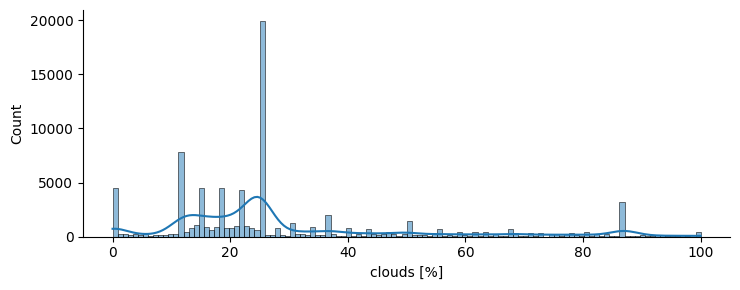

In [ ]:
sns.displot(data=df_PV["clouds [%]"], kde=True, height=3, aspect= 2.5 );

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


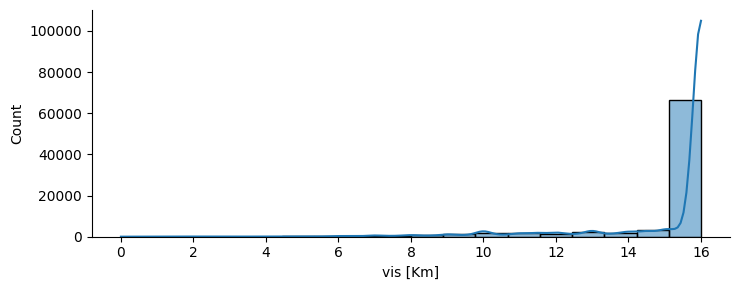

In [51]:
sns.displot(data=df_PV["vis [Km]"], kde=True, height=3, aspect= 2.5 );

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


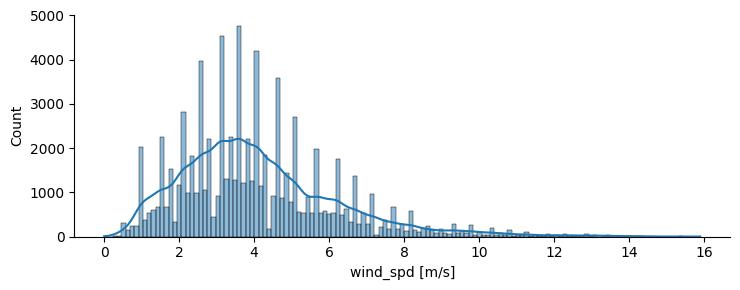

In [32]:
sns.displot(data=df_PV["wind_spd [m/s]"], kde=True, height=3, aspect= 2.5 );

In [33]:
# puedo reemplazar los outliteres superiores por una interpolacion lineal del valor anterior y posterior

# defino limites
q1 = df_PV["wind_spd [m/s]"].quantile(0.25)
q3 = df_PV["wind_spd [m/s]"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# reemplazo outliers por NaNs   
df_PV.loc[(df_PV['wind_spd [m/s]'] > lim_sup), 'wind_spd [m/s]'] = pd.NA

# Interpolate NaN values with linear interpolation
df_PV['wind_spd [m/s]'] = df_PV['wind_spd [m/s]'].interpolate(method='linear')

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


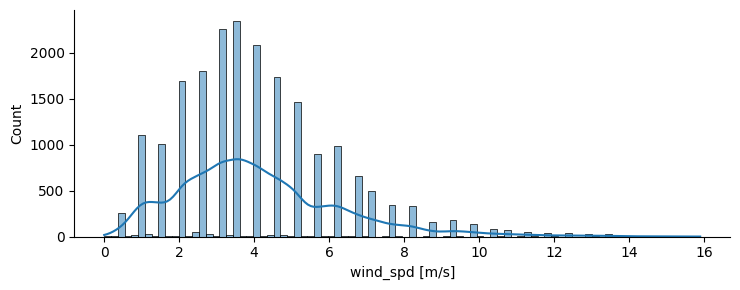

In [34]:
sns.displot(data=df["wind_spd [m/s]"], kde=True, height=3, aspect= 2.5 );

In [35]:
getNumberOfOutliersPerColumn(df_PV, df_PV.columns.values)

For pres [mb] Column, the Number of Outliers is 3505

For slp [mb] Column, the Number of Outliers is 3472

For wind_dir [m/s] Column, the Number of Outliers is 0

For wind_gust_spd [m/s] Column, the Number of Outliers is 3038

For wind_spd [m/s] Column, the Number of Outliers is 0

For temp [C] Column, the Number of Outliers is 0

For app_temp [C] Column, the Number of Outliers is 47

For rh [%] Column, the Number of Outliers is 690

For dewpt [C] Column, the Number of Outliers is 103

For clouds [%] Column, the Number of Outliers is 9901

For vis [Km] Column, the Number of Outliers is 18257

For precip [mm] Column, the Number of Outliers is 8150

For dhi [W/m^2] Column, the Number of Outliers is 0

For dni [W/m^2] Column, the Number of Outliers is 0

For ghi [W/m^2] Column, the Number of Outliers is 0

For solar_rad [W/m^2] Column, the Number of Outliers is 3

For uv [0-11+] Column, the Number of Outliers is 5876

For elev_angle [º] Column, the Number of Outliers is 0

For azimuth [º]

In [36]:
display(df_PV.describe())

,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],clouds [%],...,precip [mm],dhi [W/m^2],dni [W/m^2],ghi [W/m^2],solar_rad [W/m^2],uv [0-11+],elev_angle [º],azimuth [º],Temp interna Modulo [C],PV [Wh]
count,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.00000,82269.000000,82269.000000,82269.000000,82269.000000,...,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,82269.000000,8.226900e+04
mean,1016.125789,1016.768546,211.454363,6.153461,4.035662,17.33825,17.425942,68.854477,11.237916,29.853985,...,0.073472,42.267926,344.753431,227.129684,205.455518,1.283876,-0.477171,177.947551,32.892717,1.827891e+06
std,7.403214,7.412113,107.504602,2.984719,1.912057,6.77775,7.715605,13.617939,6.970910,22.547420,...,0.377090,46.766470,375.703397,301.761843,277.642799,1.898870,35.306645,96.830086,10.061748,1.961044e+06
min,983.000000,984.000000,0.000000,0.000000,0.000000,-0.50000,-5.300000,10.000000,-17.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-72.000000,0.000000,17.007066,0.000000e+00
25%,1012.000000,1013.000000,117.500000,4.000000,2.600000,12.35000,12.350000,60.000000,6.275000,15.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.050000,91.200000,23.669759,0.000000e+00
50%,1016.000000,1016.750000,225.000000,5.547500,3.722500,16.42500,16.425000,70.500000,11.000000,25.000000,...,0.000000,12.500000,100.250000,16.500000,20.250000,0.400000,-0.450000,176.200000,29.078962,6.073827e+05
75%,1020.000000,1021.000000,300.000000,7.600000,5.090000,23.07500,23.225000,79.000000,16.975000,34.000000,...,0.000000,90.500000,760.500000,430.250000,386.000000,1.900000,27.150000,265.300000,42.552846,4.057556e+06
max,1038.000000,1038.000000,360.000000,27.800000,8.810000,34.70000,41.500000,100.000000,26.700000,100.000000,...,12.000000,123.000000,924.000000,991.000000,970.000000,10.500000,72.100000,360.000000,53.388000,4.920826e+06


ya no hay outliers :)

## Exogenous variables

In [37]:
df_PV.reset_index(inplace=True)

In [38]:
df_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82269 entries, 0 to 82268
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp_local          82269 non-null  datetime64[ns]
 1   pres [mb]                82269 non-null  float64       
 2   slp [mb]                 82269 non-null  float64       
 3   wind_dir [m/s]           82269 non-null  float64       
 4   wind_gust_spd [m/s]      82269 non-null  float64       
 5   wind_spd [m/s]           82269 non-null  float64       
 6   temp [C]                 82269 non-null  float64       
 7   app_temp [C]             82269 non-null  float64       
 8   rh [%]                   82269 non-null  float64       
 9   dewpt [C]                82269 non-null  float64       
 10  clouds [%]               82269 non-null  float64       
 11  vis [Km]                 82269 non-null  float64       
 12  precip [mm]              82269 n

In [39]:
df_PV["Year"] = df_PV["timestamp_local"].dt.year
df_PV["Month"] = df_PV["timestamp_local"].dt.month
df_PV["Hour"] = df_PV["timestamp_local"].dt.hour
df_PV["DayOfWeek"] = df_PV["timestamp_local"].dt.day_of_week
df_PV["DayOfYear"] = df_PV["timestamp_local"].dt.day_of_year
df_PV["Day"] = df_PV["timestamp_local"].dt.day
df_PV["Minute"] = df_PV["timestamp_local"].dt.minute

In [40]:
df_PV

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],...,azimuth [º],Temp interna Modulo [C],PV [Wh],Year,Month,Hour,DayOfWeek,DayOfYear,Day,Minute
0,2022-01-01 00:00:00,1027.00,1028.00,360.0,4.000,1.00,10.70,10.70,92.00,9.500,...,323.500,22.066196,0.0,2022,1,0,5,1,1,0
1,2022-01-01 00:15:00,1027.00,1028.00,357.5,4.100,1.40,10.70,10.70,91.00,9.325,...,243.575,22.066196,0.0,2022,1,0,5,1,1,15
2,2022-01-01 00:30:00,1027.00,1028.00,355.0,4.200,1.80,10.70,10.70,90.00,9.150,...,163.650,22.066196,0.0,2022,1,0,5,1,1,30
3,2022-01-01 00:45:00,1027.00,1028.00,352.5,4.300,2.20,10.70,10.70,89.00,8.975,...,83.725,22.066196,0.0,2022,1,0,5,1,1,45
4,2022-01-01 01:00:00,1027.00,1028.00,350.0,4.400,2.60,10.70,10.70,88.00,8.800,...,3.800,22.066196,0.0,2022,1,1,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82264,2024-05-06 22:00:00,1013.00,1014.00,0.0,0.500,0.50,16.00,16.00,77.00,12.000,...,304.900,24.460248,0.0,2024,5,22,0,127,6,0
82265,2024-05-06 22:15:00,1013.25,1014.25,57.5,0.775,0.75,15.75,15.75,78.25,12.000,...,307.925,24.347321,0.0,2024,5,22,0,127,6,15
82266,2024-05-06 22:30:00,1013.50,1014.50,115.0,1.050,1.00,15.50,15.50,79.50,12.000,...,310.950,24.234394,0.0,2024,5,22,0,127,6,30
82267,2024-05-06 22:45:00,1013.75,1014.75,172.5,1.325,1.25,15.25,15.25,80.75,12.000,...,313.975,24.121467,0.0,2024,5,22,0,127,6,45


# Some Plots

Text(0.5, 0.98, '')

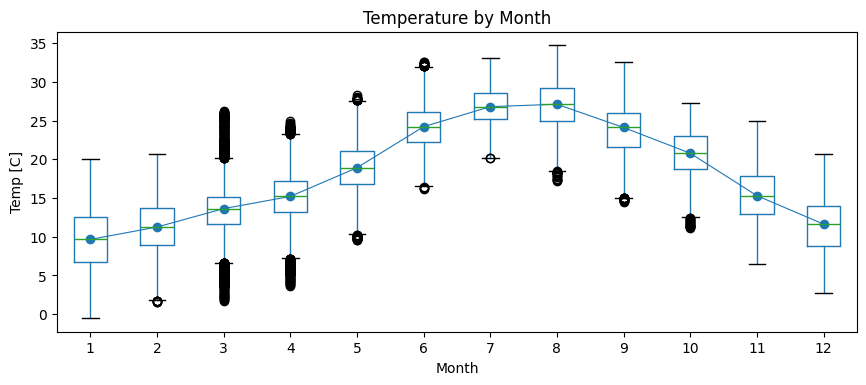

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='temp [C]', by='Month', ax=ax)
df_PV.groupby('Month')['temp [C]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Temp [C]')
ax.set_title("Temperature by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

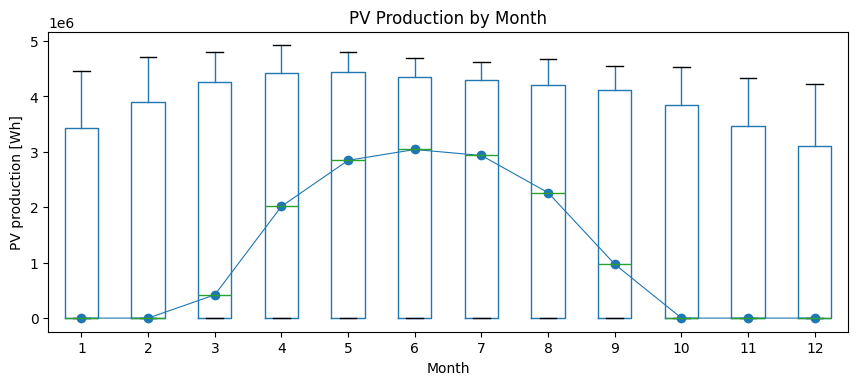

In [55]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV [Wh]', by='Month', ax=ax)
df_PV.groupby('Month')['PV [Wh]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

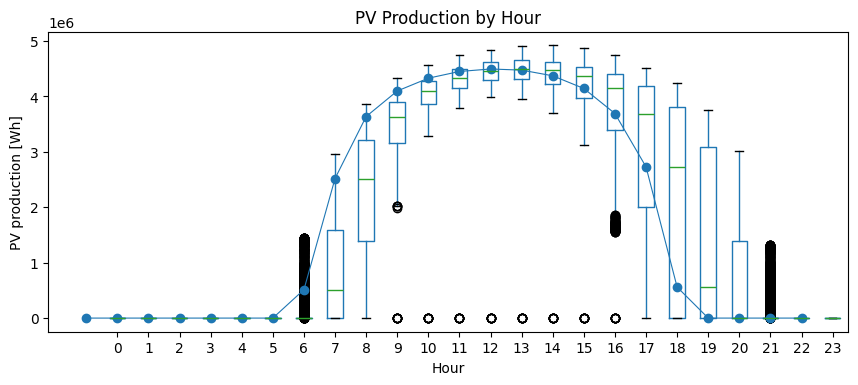

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV [Wh]', by='Hour', ax=ax)
df_PV.groupby('Hour')['PV [Wh]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Hour")
fig.suptitle('')

Text(0.5, 0.98, '')

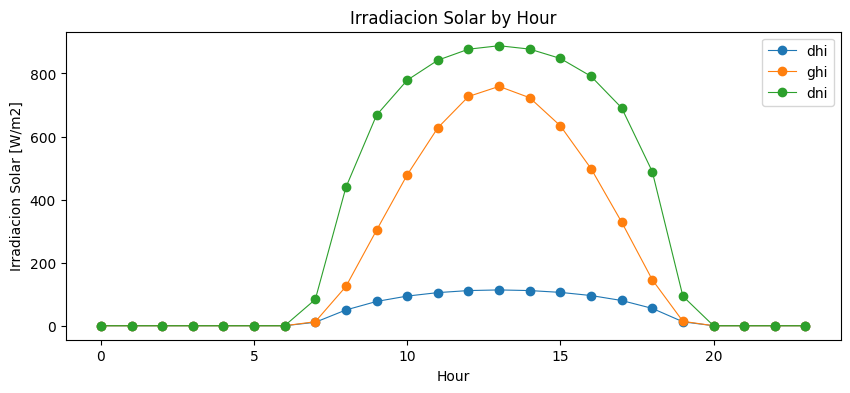

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

# df_PV.boxplot(column='dhi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dhi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='ghi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['ghi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='dni [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dni [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_title("Irradiacion Solar by Hour")
fig.suptitle('')

# DF para mergerar con Consumo

In [ ]:
df_PV

,timestamp_local,pres [mb],slp [mb],wind_dir [m/s],wind_gust_spd [m/s],wind_spd [m/s],temp [C],app_temp [C],rh [%],dewpt [C],...,PV,Temp interna Modulo [C],PV Wh,Year,Month,Hour,DayOfWeek,DayOfYear,Day,Minute
0,2022-01-01 00:00:00,1027.00,1028.00,360.0,4.000,1.00,10.70,10.70,92.00,9.500,...,0.0,22.066196,0.0,2022,1,0,5,1,1,0
1,2022-01-01 00:15:00,1027.00,1028.00,357.5,4.100,1.40,10.70,10.70,91.00,9.325,...,0.0,22.066196,0.0,2022,1,0,5,1,1,15
2,2022-01-01 00:30:00,1027.00,1028.00,355.0,4.200,1.80,10.70,10.70,90.00,9.150,...,0.0,22.066196,0.0,2022,1,0,5,1,1,30
3,2022-01-01 00:45:00,1027.00,1028.00,352.5,4.300,2.20,10.70,10.70,89.00,8.975,...,0.0,22.066196,0.0,2022,1,0,5,1,1,45
4,2022-01-01 01:00:00,1027.00,1028.00,350.0,4.400,2.60,10.70,10.70,88.00,8.800,...,0.0,22.066196,0.0,2022,1,1,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82264,2024-05-06 22:00:00,1013.00,1014.00,0.0,0.500,0.50,16.00,16.00,77.00,12.000,...,0.0,24.460248,0.0,2024,5,22,0,127,6,0
82265,2024-05-06 22:15:00,1013.25,1014.25,57.5,0.775,0.75,15.75,15.75,78.25,12.000,...,0.0,24.347321,0.0,2024,5,22,0,127,6,15
82266,2024-05-06 22:30:00,1013.50,1014.50,115.0,1.050,1.00,15.50,15.50,79.50,12.000,...,0.0,24.234394,0.0,2024,5,22,0,127,6,30
82267,2024-05-06 22:45:00,1013.75,1014.75,172.5,1.325,1.25,15.25,15.25,80.75,12.000,...,0.0,24.121467,0.0,2024,5,22,0,127,6,45


In [ ]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_weather_&_PV_2022_2023.csv"
ruta_completa = os.path.join(ruta_data, nombre_archivo)

df_PV.to_pickle(ruta_completa)